In [2]:
import numpy as np
import nltk
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and creating labels


In [3]:
path2file = r"C:\Users\aa\Desktop\University\Semester 5\DSSG\DRK\master_20220928_1_sqlite\scraped.csv"
df = pd.read_csv(path2file)

In [4]:
labels = [tit.split("- DRK")[0].split("– DRK")[0] for tit in df.title.tolist()] # Extracting Labels from dataframe
labels

['Spenden ',
 'Stromschlag ',
 'Über uns ',
 'Mutter-Kind-Kur ',
 'Rotkreuzkurs "Erste Hilfe" für Führerscheinbewerber ',
 'Notfälle mit Kindern ',
 'Pflegeheim Bad Lobenstein ',
 'Unterzeichnung Ausbildungsverträge ',
 'Pflegekonzept ',
 'Soziale Betreuung / Freizeitangebote ',
 'Downloadbereich ',
 'Kleiderspende ',
 'Jetzt spenden ',
 'Stadtfest Pößneck ',
 'Ambulanter Pflegedienst Schleiz/Tanna ',
 'Aufnahme/Gebühren ',
 'Geschichte ',
 'Ambulanter Pflegedienst Pößneck ',
 'Einsatzeinheiten ',
 'Aktuelles ',
 'Schwangerschaftskonfliktberatung ',
 'Meldungen ',
 'Rot-Kreuz-Sozialladen / Kleidersammlung ',
 'Angebote ',
 'Schwerpunkte ',
 'Innere Erkrankungen und Verletzungen ',
 'Festival Sonne Mond Sterne ',
 'Sprechzeiten ',
 'Spenden ',
 'Unsere Leistungen mit Leistungsbeschreibung ',
 'Die Grundsätze des Roten Kreuzes und Roten Halbmondes ',
 'Wiederbelebung bei Kindern und Säuglingen ',
 'Notruf 112 ',
 'Kontaktformular ',
 'Ausbildungs- und Stellenangebote ',
 'Aktiven Anmeldu

In [4]:
label_count = Counter(labels) # Count the number of labels
slabel_count = sorted(label_count.items(), key=lambda x:x[1], reverse=False) # sorted by frequency of labels
slabel_count

NameError: name 'labels' is not defined

In [ ]:
num_of_labels = len(slabel_count) # 72458

# Applying TF-IDF to the Dataframe

In [133]:
de_stopwords = stopwords.words('german')

remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def preprocess(text):
  return nltk.word_tokenize(text.lower().translate(remove_punctuation_map))

In [118]:
vectorizer = TfidfVectorizer(tokenizer=preprocess, stop_words=de_stopwords)

In [134]:
def compute_similarity(a, b):
  tfidf = vectorizer.fit_transform([a, b])

  return ((tfidf * tfidf.T).toarray())[0,1]

In [5]:
#df_gewalt = df[df['text'].str.contains('Gewalt')].reset_index()
#df_frauenhaus = df[df['text'].str.contains('Frauenhaus')]
#df_gen = df[df['text'].str.contains('Kurs für Erste Hilfe in Schulen und Betreuungs-Einrichtungen')].reset_index()
df_m = df[df['text'].str.contains('Obdachlosigkeit')].reset_index()
#df_m

In [7]:
#gewalt_text = df_gewalt.text.tolist()
#frauenhaus_text = df_frauenhaus.text.tolist() 
obdach_text = df_m.text.tolist()

In [9]:
obdach_text[7]

'Viele kleine gute Taten ergeben am Schluss eine große Hilfe – das zeigte sich jüngst bei der „Aktion Kilo“ des katholischen Jugendprojekts „Looking good – inside & out“. 20 Mädchen aus dem Allgäu im Alter von 11-16 Jahren sammelten vor vier Supermärkten in Kempten und Umgebung insgesamt rund eine halbe Tonne Lebensmittel zugunsten der Wärmestube des BRK in Kempten. Dort war man von der tollen Aktion begeistert. „Das ist eine der größten Lebensmittelspenden, die wir je erhalten haben“, freute sich die Leiterin der Einrichtung, Amelie Lang. \n\n\n\nDie engagierten Mädchen des Looking Good Teams Allgäu und ihre sechs Gruppenleiterinnen hatten am ersten Juniwochenende vor vier Supermärkten in der Region Stände aufgebaut. Sie ließen sich auch vom Regen die gute Laune und die Freude am Helfen nicht verderben. Die Mädchen baten die Einkaufenden, ein Kilo mehr an haltbaren Lebensmitteln zu kaufen und für Bedürftige zu spenden. Flyer und Banner erläuterten die Aktion.\n\n\n\nDie Mühe hat sich 

In [22]:
frauenhaus_text[19]

'Magdeburg/Jerichower Land | Der Ideenwettbewerb „Rot-Kreuz-Poesie“ fand in den letzten beiden Tagen mit der Überreichung der Gewinne seinen Abschluss. Die Jury hatte sich gut einen Monat genommen, um alle Einsendungen zu prüfen und zu bewerten. Dabei waren nicht allein die Geschichten rund um das Deutsche Rote Kreuz allein von Bedeutung. „Wir haben es uns nicht einfach gemacht mit der Ermittlung der Gewinner. Da im Bereich Liedkunst keine Einsendungen erfolgen, konnten wir uns auf die Bereiche Kurzgeschichten und Gedichte konzentrieren“, erklärt DRK-Pressesprecher und Jurymitglied Christian Luckau. Am Ende des Auswahlverfahrens standen zwei Gewinnerinnen fest, die mit ihren Einsendungen die Jury überzeugten. „Das Gedicht von Jennifer Schwarz umfasst in Gänze die sozialen Dienste des DRK-Regionalverbandes und seiner Mitarbeitenden, dadurch fand es in der Jury großen Anklang“, so DRK-Vorstand Frank Ruth. Ganz anderes gestaltete sich die Kurzgeschichte von Gerlinde Rose. Sie beinhaltete 

In [21]:
gewalt_text[10]

'\n• Erlernen und Sicherstellung von Erste Hilfe - Richtiger Umgang mit Notsituationen\n• Erkennen von Risiken und Hilfsmöglichkeiten praktisch einzuschätzen, um im Ernstfall eigenverantwortlich und kontrolliert reagieren zu können.\n• Förderung der Sozialkompetenz der Schüler d.h. Beitrag zur Gewaltprävention, denn "Wer anderen hilft, schlägt nicht"\n\nWas geht davon über den Lehrplan hinaus?\n• Interesse wecken an ehrenamtlicher Tätigkeit im Deutschen Roten Kreuz\n• Nachwuchsförderung für den Katastrophenschutz der Stadt Plauen und dem Vogtlandkreis\n• Vorraussetzung für den Kurs ist ein abgeschlossener Erste Hilfe - Grundlehrgang, der nicht älter als 2 Jahre sein darf\n• Einweisung in den medizinischen Hintergrund bestimmter Herzerkrankungen sowie Kreislaufstillstand und plözlichem Herztod\n• Informationen über das Prinzip der Defibrillation, Funktion und Anwendung des AED'

In [122]:
compute_similarity(frauenhaus_text[0],gewalt_text[10])

0.17886351105144851

In [165]:
M = np.zeros((df_m.shape[0], df_m.shape[0])) # we create a nxn matrix to contain the results of text search
for i, row in tqdm(df_m.iterrows(), total=df_m.shape[0], desc='1st level'):
	for j, next_row in df_m.iterrows(): 
		M[i, j] = compute_similarity(row.text, next_row.text)

1st level: 100%|██████████| 47/47 [00:16<00:00,  2.83it/s]


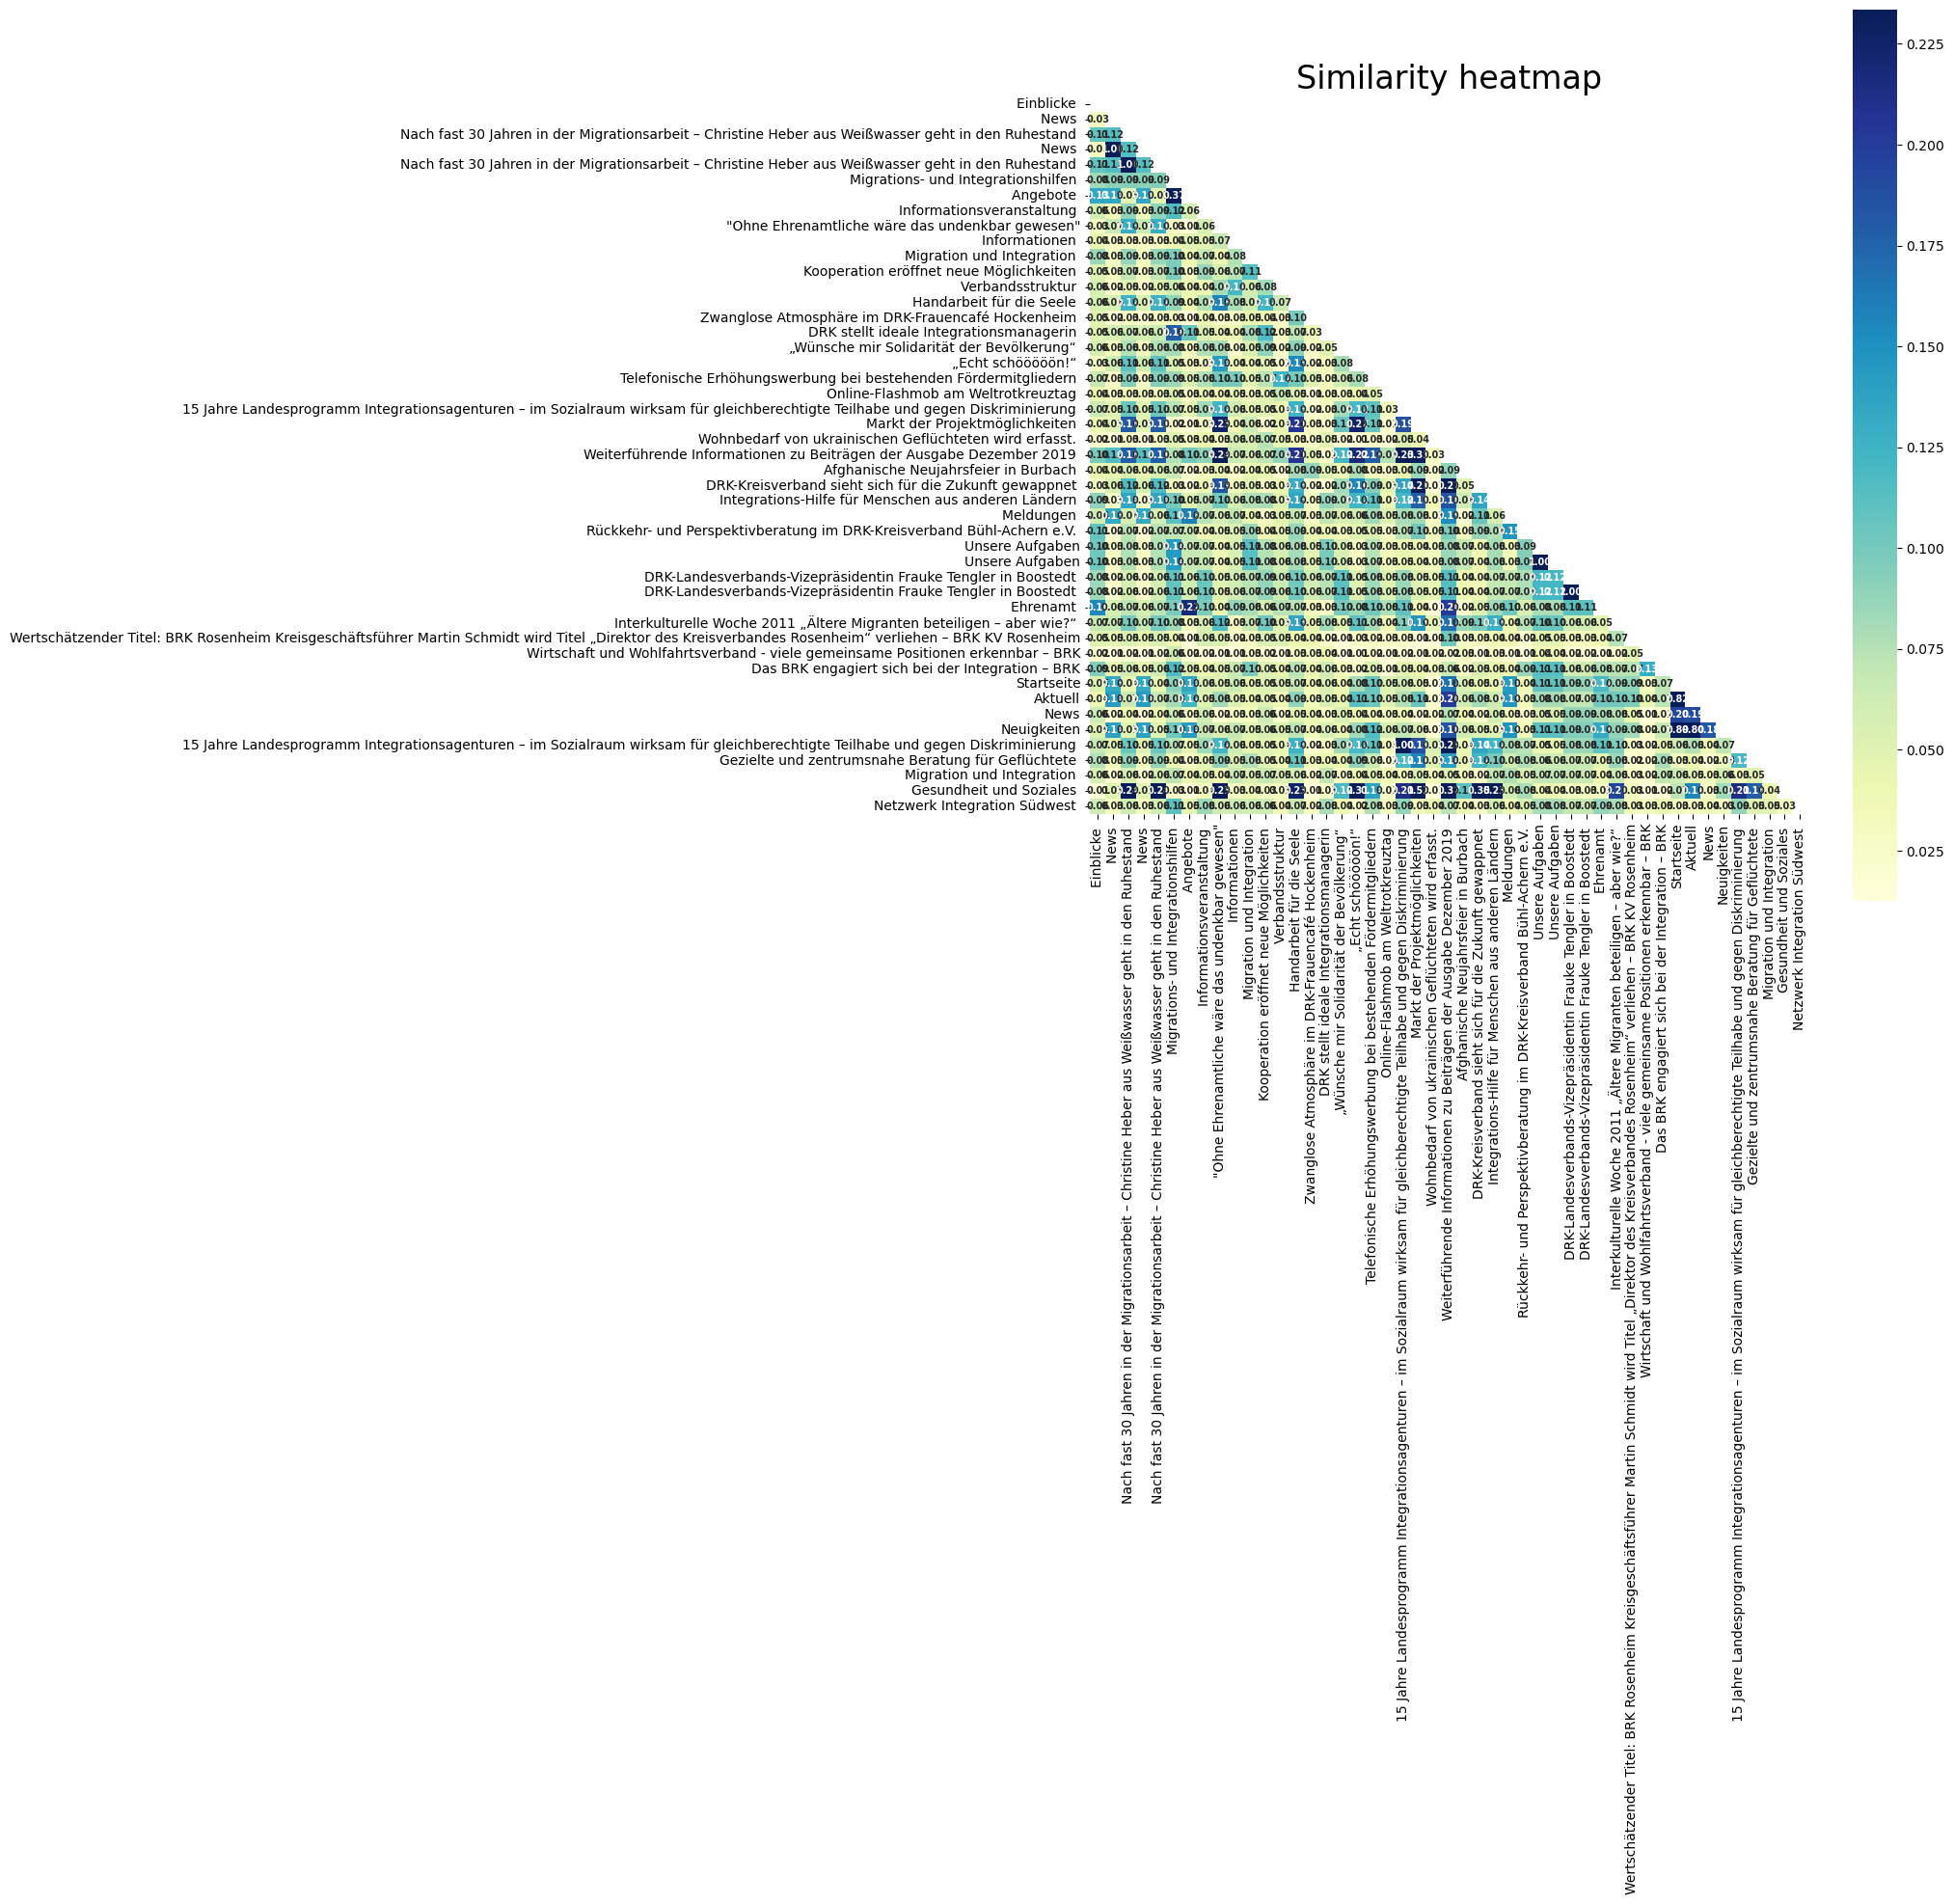

In [160]:
titles = [tit.split("- DRK")[0].split("– DRK")[0] for tit in df_m.title.tolist()]
similarity_df = pd.DataFrame(M, columns=titles, index=titles) # let's create the dataframe
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(12, 12))
sns.heatmap(
			similarity_df,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=similarity_df.columns,
			xticklabels=similarity_df.columns,
			cmap="YlGnBu",
			mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()

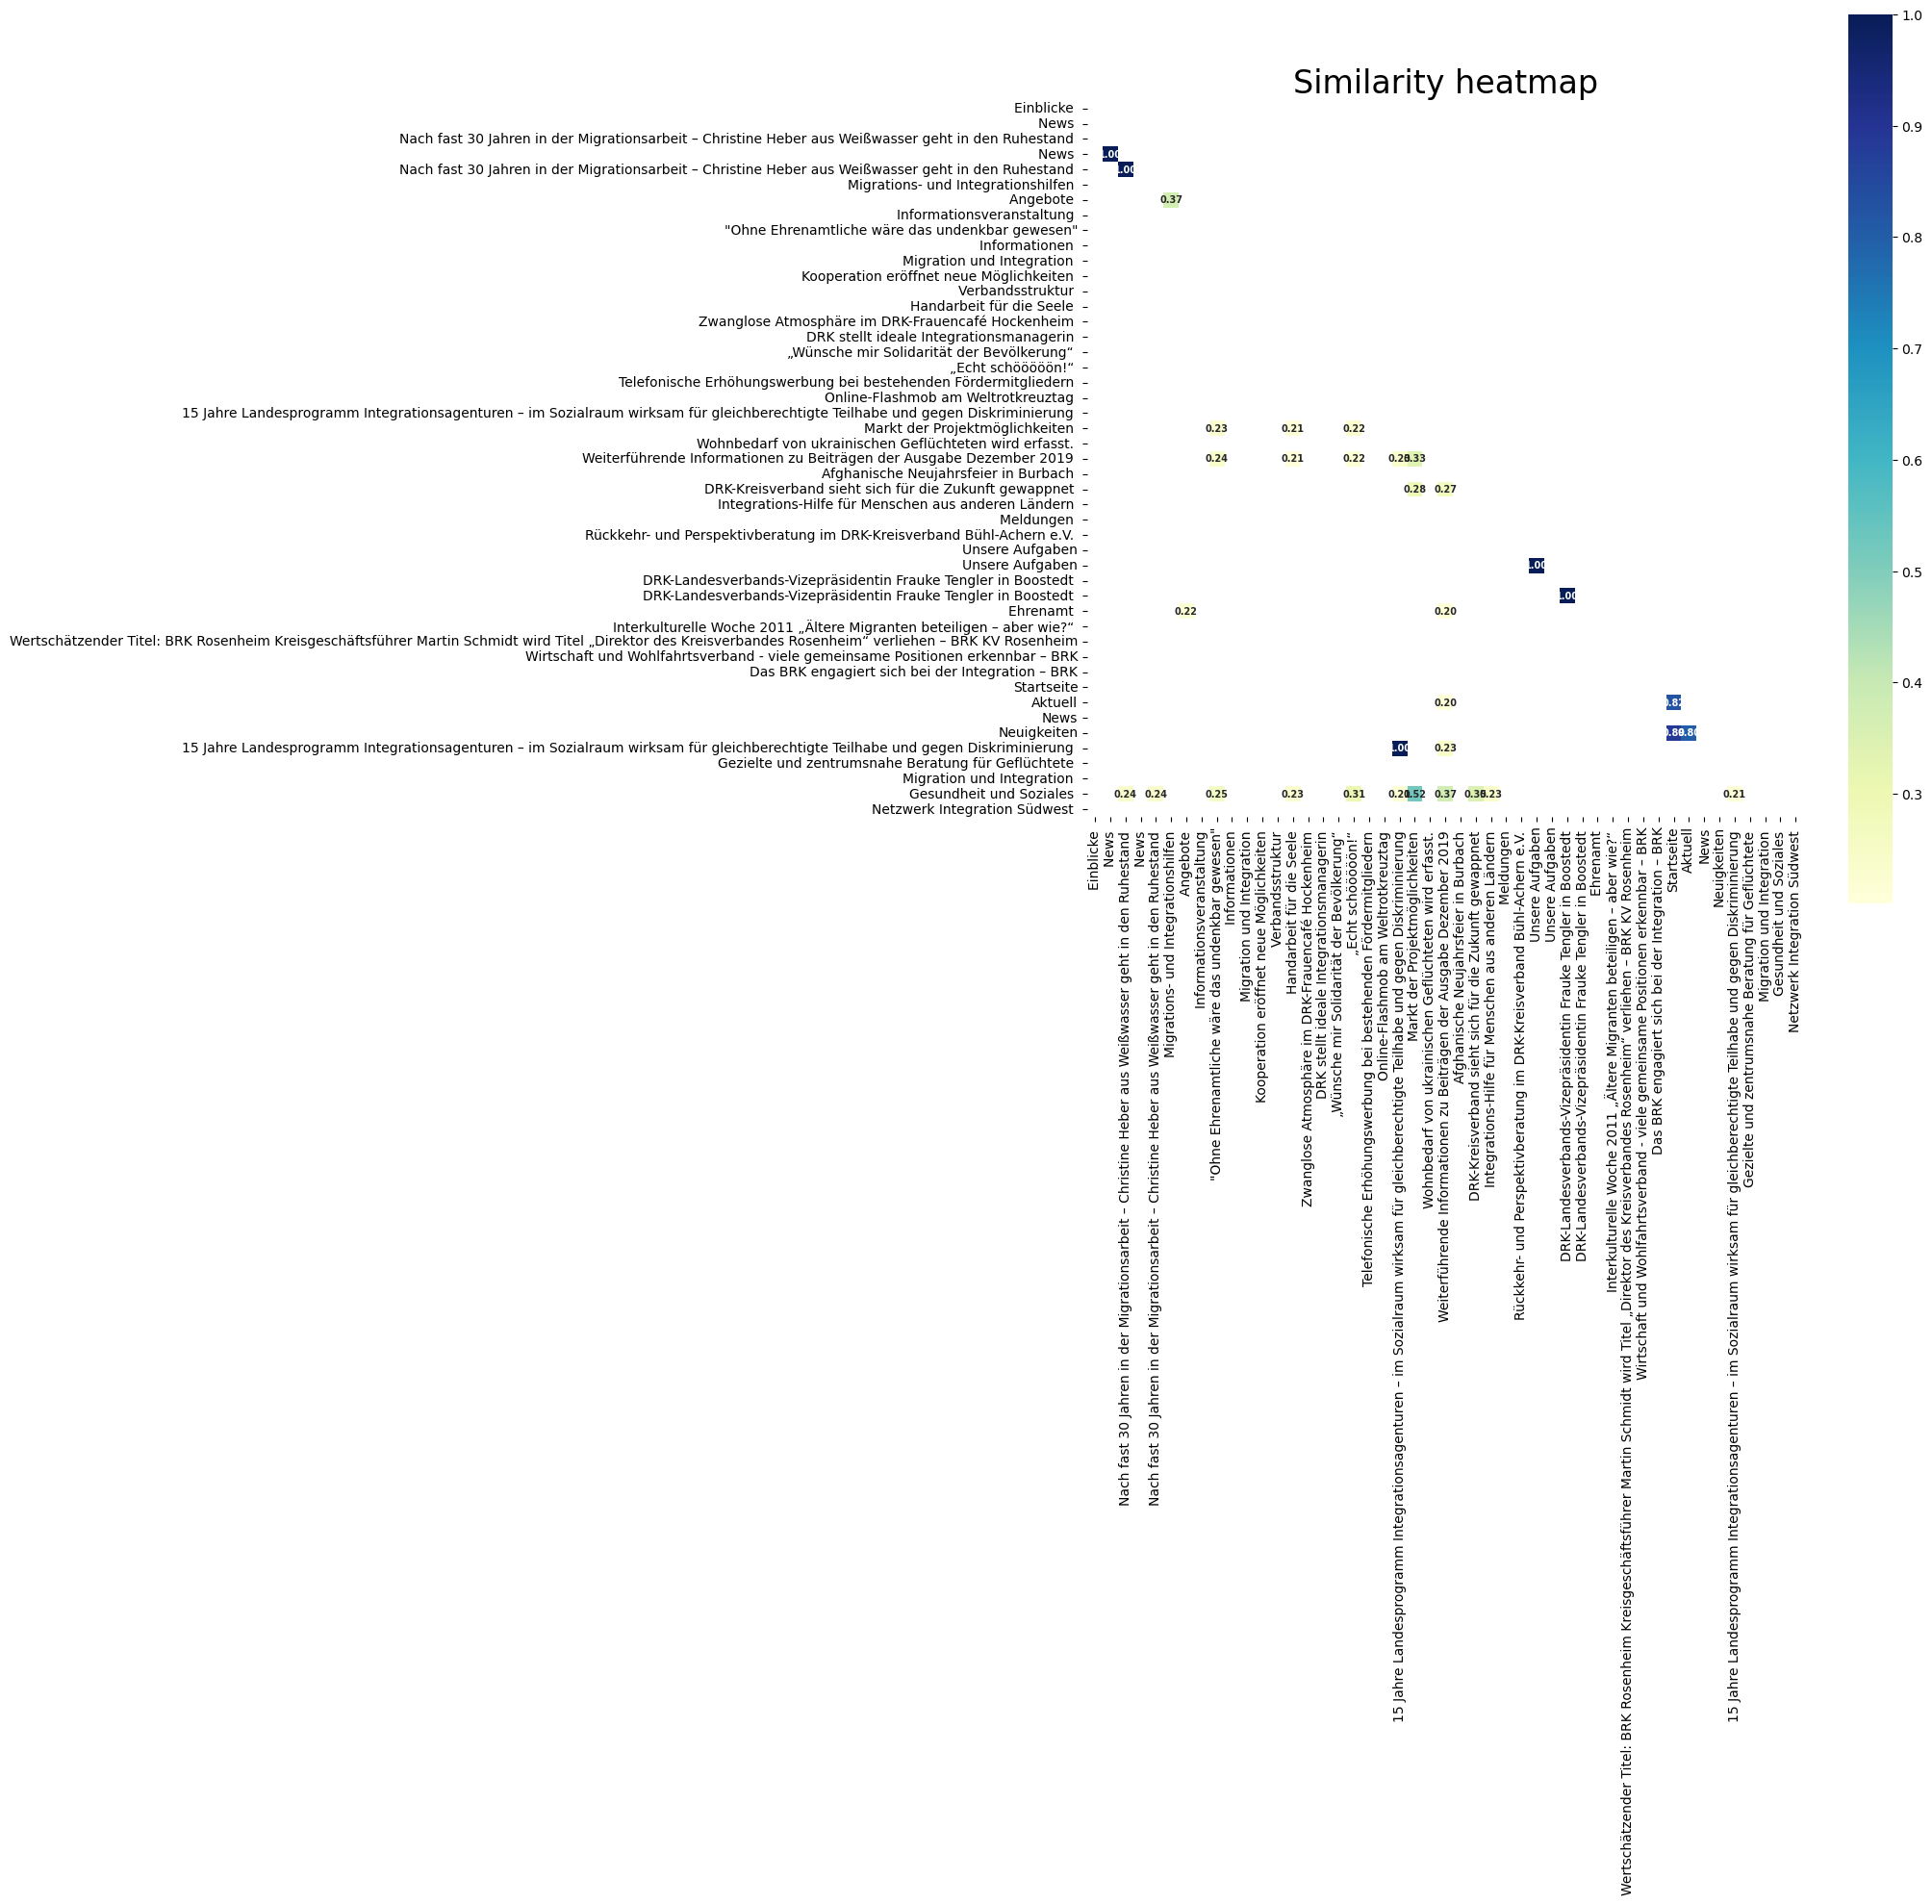

In [145]:
top = similarity_df[similarity_df > 0.2] # change this
mask = np.triu(np.ones_like(top))

# let's create the viz
plt.figure(figsize=(12, 12))
sns.heatmap(
			top,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=top.columns,
			xticklabels=top.columns,
			cmap="YlGnBu",
			mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()

# Try out spacy

In [ ]:
# import spacy
# from spacy.lang.de.examples import sentences 
from bertopic import BERTopic
# import spacy_cleaner
# from spacy_cleaner.processing import removers, replacers, mutators

# docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
# nlp = spacy.load('de_core_web_sm', exclude=['tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer'])

# topic_model = BERTopic(embedding_model=nlp)
# topics, probs = topic_model.fit_transform(docs)

# fig = topic_model.visualize_topics()
# fig.show()


In [8]:
!pip install bertopic[flair]

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install bertopic[gensim]

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install bertopic[spacy]

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install bertopic[use]

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 108.8/108.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.0/5.0 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 266.3/266.3 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 5.3 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.4 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 124.6/

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\aa\\AppData\\Local\\Temp\\pip-build-tracker-pfh7sb_i\\51be2dda81ab86da739f736ebd6d7f45f061ae028701d1e3e459002d'



Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_text-2.10.0-cp39-cp39-win_amd64.whl (5.0 MB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached flatbuffers-22.11.23-py2.py3-none-any.whl (26 kB)
  Using cach

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\aa\\AppData\\Local\\Temp\\pip-build-tracker-r6ys4u8n\\51be2dda81ab86da739f736ebd6d7f45f061ae028701d1e3e459002d'

